./configs/harmonic_driven.json
./configs/harmonic_driven.json
./configs/harmonic_driven.json
./configs/harmonic_driven.json
./configs/harmonic_driven.json


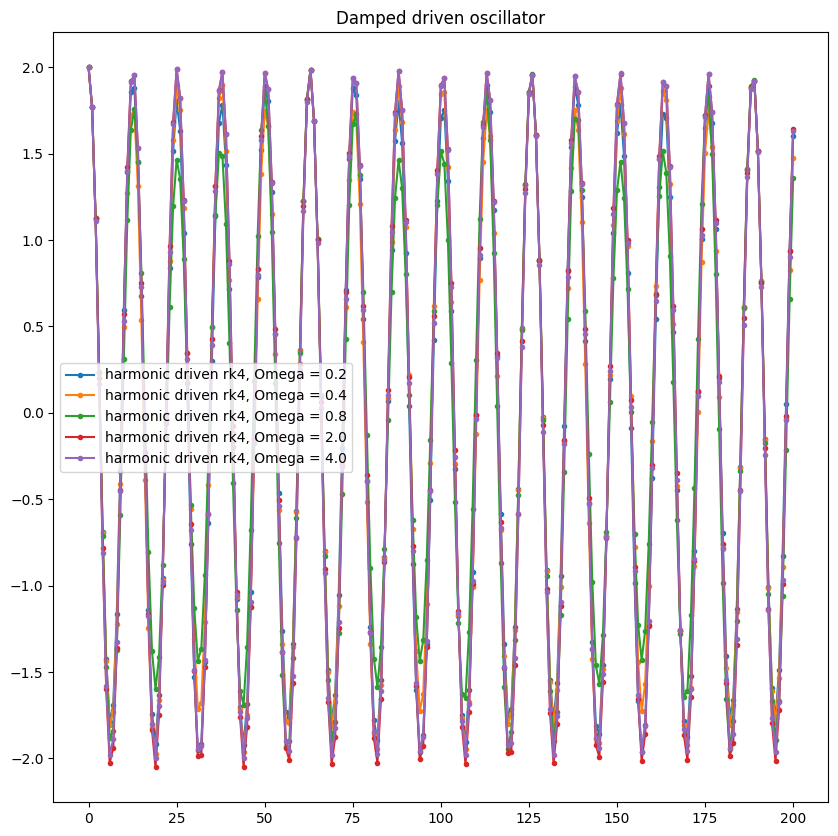

In [6]:
from src.plot_context import *
from src.config_helper import *
from src.plotter import *

import matplotlib.pyplot as plt

# sympy
# plot only range
# virutal inheritance (both damped and driven and physic)
# make damped, driven only function that init DiffEq
# make GUI
# make visualization
# find amplitude of dataset
# Make report

omegas = [0.2, 0.4, 0.8, 2.0, 4.0]

def prepare_harmonic_and_physic():

    fig, ax = plt.subplots(1)
    ax.set_title('Damped driven oscillator')
    fig.set_size_inches(10, 10)
    # axs.set_xlabel('Time sample')
    # axs.set_ylabel('X coordiante')
    
    return fig, ax

damped_config = Config('harmonic_driven',{
                                        	"model" : "HarmonicDriven",
                                        	"solver" : "rk4",
                                        	"output" : "harmonic_driven.bin",
                                        
                                        	"m" : 1,
                                        	"w" : 1,
                                        	"damp_ratio" : 0,
                                        	"A" : 1,
                                        	"Omega" : 2,
                                        
                                        	"x0" : 2, 
                                        	"v0" : 0,
                                        
                                        	"t1" : 0,
                                        	"t2" : 100,
                                        	"sampleNum" : 200
                                            })

damped_config['A'] = 0.1
damped_config['Omega'] = 0.2
damped_config.write()


with PlotContextManager(prepare_harmonic_and_physic, "harmonic vs physic") as axs:

        for i in range(len(omegas)):

            damped_config['Omega'] = omegas[i]
            damped_config.write()
            
            solver_program_path = './solver.exe'
            run_config(solver_program_path, damped_config.name)
            
            solver_name = damped_config['solver']
            damp_ratio = damped_config['damp_ratio']
        
            ses_name = f'harmonic driven {solver_name}, Omega = {omegas[i]}'
            ses_info = SesInfo(ses_name, damped_config, Style('.'))
    
            SesPlotter.plot_x(ses_info, axs)
            axs.legend()
    
        # plt.savefig('damped_driven_different_omegas.svg')
     